In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

vers_ren spacy-lg-3.5.1
{'voc_eval_res': {'precision': 52.1127, 'recall': 14.0684, 'f-score': 22.1557}, 'KL_res': {'KL divergence': 3.7133453231099915, 'Euclidean Dist.': 0.28337678401256894, 'WER': 0.792016806722689, 'CER': 0.5567624386825508, 'Cosine Dist.': 0.3573105457105282}, 'occ_eval_res': {'precision': 50.7042, 'recall': 22.6891, 'f-score': 31.3498}, 'clean_eval': {'f-score': 10.126582278481013, 'precision': 7.637231503579953, 'recall': 15.023474178403756, 'tp': 32, 'fp': 387, 'fn': 181}, 'jaccard': [0.7487899322362053], 'braycurtis': [0.4380247900839664], 'dice': [0.5984526112185686], 'cosinus': [0.20972005878453392]}
Version :  Tess. fr -- jspl-ELTeCfr
vers_ren spacy-lg-3.5.1
{'voc_eval_res': {'precision': 52.1127, 'recall': 13.7037, 'f-score': 21.7009}, 'KL_res': {'KL divergence': 3.963696286831826, 'Euclidean Dist.': 0.30999524049517635, 'WER': 0.8210735586481114, 'CER': 0.5577264653641207, 'Cosine Dist.': 0.47812439971915954}, 'occ_eval_res': {'precision': 47.8873, 'recall

,Auteur,Configuration,Distance,Metric,REN
65,NOAILLES,Kraken,0.335607,cosinus,spacy-lg-3.5.1
35,CARRAUD,Kraken,0.242677,cosinus,spacy-lg-3.5.1
41,DASH,Kraken,0.185805,cosinus,spacy-lg-3.5.1
29,BALZAC,Kraken,0.183131,cosinus,spacy-lg-3.5.1
5,ADAM,Kraken,0.117546,cosinus,spacy-lg-3.5.1
...,...,...,...,...,...
7,AIMARD-RIVIERE,Tess. fr -- jspl-fr,0.029382,cosinus,spacy-lg-3.5.1
61,NOAILLES,Tess. fr -- jspl-fr,0.068523,cosinus,spacy-lg-3.5.1
31,CARRAUD,Tess. fr -- jspl-fr,0.544714,cosinus,spacy-lg-3.5.1
1,ADAM,Tess. fr -- jspl-fr,0.230734,cosinus,spacy-lg-3.5.1


/tmp/ipykernel_51651/2017610035.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
/tmp/ipykernel_51651/2017610035.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Distance", y="Configuration", data=data_tab1,


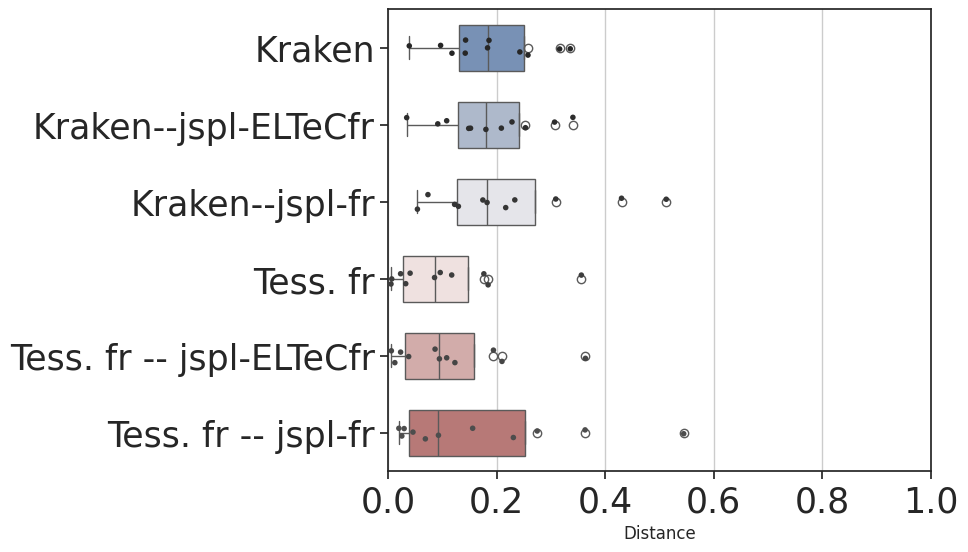

In [71]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

lt_version_doc=["DATA_ELTeC-fra_EVAL-1", "DATA_ELTeC-fra_EVAL-corr-automatique", "ELTeC-fra_Complet_ENliste","DATA_ELTeC-fra_EVAL-corr-automatique-spaCy3.5.1","DATA_ELTeC-fra_EVAL-spaCy3.5.1"]
# lt_version_doc=["fra_spaCy3.5.1","eng_spaCy3.5.1","Por_spaCy3.5.1"]
version_doc=lt_version_doc[3]
calcul=["sim2-3","word"]
calc=calcul[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
path_data = f"../{version_doc}_Distances/*/*OCR/*/NER/SIM/{calc}*.json"## NER

for path in glob.glob(path_data):
    # print(path)
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    # print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    vers_ren=path.split("_")[-1].split("-liste.json")[0]
    print("vers_ren",vers_ren)
    
    distance=lire_fichier(path)
    print(distance)

    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken","Kraken",version)
        print("Version : ", version)

    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)

    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png","Tess. fr",version)
        print("Version : ", version)

    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
         print("Version : ", version)
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)

    if version == "tesseract0.3.10":
        version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
        print("version : ", version)

    if version == "kraken4.3.13.dev25":
        version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
        print("version : ", version)

    if version == "lectaurep-kraken4.3.13.dev25":
        version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
        print("version : ", version)

    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == "cosinus":
            for r in res_dist:
            #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                liste_dist.append(r)
                liste_version_ren.append(vers_ren)
#
#         # if key=="KL_res":
#         #     for k, v in res_dist.items():
#         #         if k=="Cosine Dist.":
#         #             print(v)
#         #             liste_name_metric.append(k)
#         #             # liste_version.append(version)
#         #             liste_config.append(version)#+"--"+paire)
#         #             liste_auteur.append(autor)
#         #             # liste_version_spacy.append(version_spacy)
#         #             liste_dist.append(v)

tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)

version_ren_set=set(liste_version_ren)
# print(version_ren_set)
for i in version_ren_set:
    print(i)
    data_tab1=data_tab.query('REN == @i ')
    display(data_tab1)
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))
    ax.set_xscale("linear")

    # Load the example planets dataset
    # planets = sns.load_dataset("planets")

    # Plot the orbital period with horizontal boxes
    # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #             whis=[0, 100], width=.6, palette="vlag")
    sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
                whis=[0, 1], width=.6, palette="vlag")#, legend=False)

    # Add in points to show each observation
    # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #               size=4, color=".3", linewidth=0)
    sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
                  size=4, palette='dark:.3', linewidth=0)#, legend=False)

    # Tweak the visual presentation
    plt.tick_params(axis = 'both', labelsize = 25)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    plt.xlim([0,x])
#
#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/{version_doc}_{i}-{calc}.png",dpi=300, bbox_inches="tight")##NER

In [63]:
# !python --version